# 🧠 Logistic Regression Notebook
In this notebook, we will explore:
- Logistic Regression from scratch
- Sigmoid activation
- Log loss visualization
- Model training with scikit-learn
- Manual evaluation metrics (Accuracy, Precision, Recall, F1)
- ROC Curve and AUC
- Z-scores and interpretation using statsmodels


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


## 🔁 Step 1: Implement Sigmoid and Logistic Regression from Scratch
We define a simple logistic regression model with 1 feature, and manually optimize using gradient descent.


In [3]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def manual_Logistic_Regression(X, y, n=10000, alpha=0.001):
    w = 0
    b = 0
    m = len(X)
    for _ in range(n):
        y_pred = [sigmoid(w * x + b) for x in X]
        errors = [yp - yt for yp, yt in zip(y_pred, y)]
        b_grad = sum(errors) / m
        w_grad = sum(e * x for e, x in zip(errors, X)) / m
        w -= w_grad * alpha
        b -= b_grad * alpha
    return w, b

# Try a dummy run
manual_Logistic_Regression([10,10,10,10,9,18,7,1],[1,0,1,0,0,1,0,0])


(0.09479325025289272, -1.0533528630816613)

## 📉 Step 2: Visualize Log Loss
We visualize how log loss penalizes predictions for both class 1 and class 0.


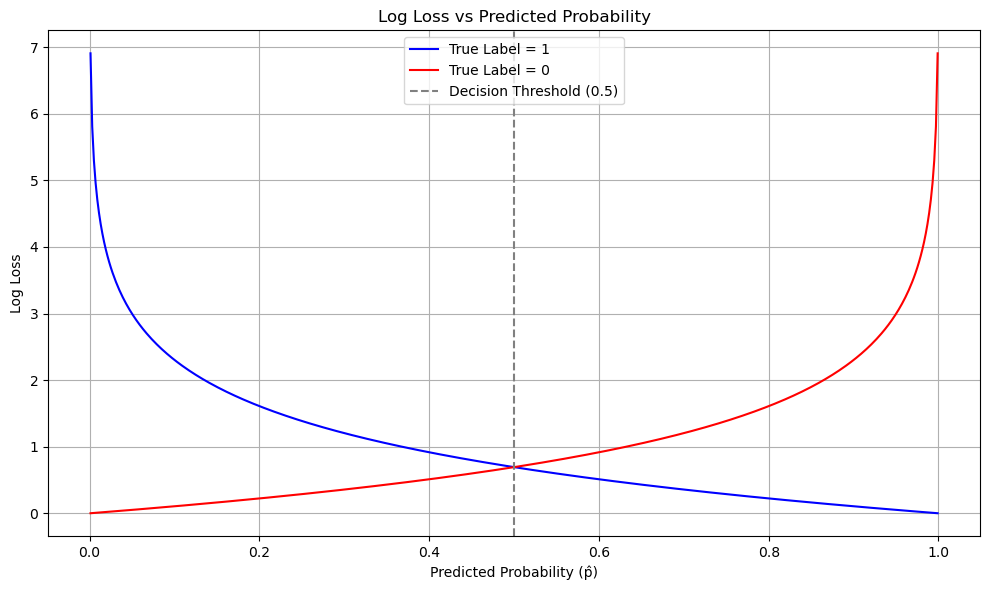

In [4]:
p = np.linspace(0.001, 0.999, 500)
log_loss_y1 = -np.log(p)
log_loss_y0 = -np.log(1 - p)

plt.figure(figsize=(10, 6))
plt.plot(p, log_loss_y1, label='True Label = 1', color='blue')
plt.plot(p, log_loss_y0, label='True Label = 0', color='red')
plt.axvline(0.5, linestyle='--', color='gray', label='Decision Threshold (0.5)')
plt.title('Log Loss vs Predicted Probability')
plt.xlabel('Predicted Probability (p̂)')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📦 Step 3: Load and Preprocess Data
We load a dataset and convert binary categorical variables to 0/1 for logistic regression.


In [5]:
df = pd.read_csv("personality_datasert.csv")

df["label"] = np.where(df["Personality"] == "Extrovert", 1, 0)
df["Stage_fear"] = np.where(df["Stage_fear"] == "Yes", 1, 0)
df["Drained_after_socializing"] = np.where(df["Drained_after_socializing"] == "Yes", 1, 0)


## 🧪 Step 4: Train Logistic Regression Model
We split into training and testing sets and fit a logistic regression model using scikit-learn.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[["Social_event_attendance", "Going_outside", "Stage_fear", "Time_spent_Alone", "Post_frequency"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predicted_proba = model.predict_proba(X_test)
pred_proba_one = [i[1] for i in predicted_proba]


## 📊 Step 5: Define Manual Evaluation Function (Precision, Recall, F1, Accuracy, AUC)
We evaluate the classifier manually using thresholded predictions and draw ROC curve.


Accuracy: 0.9241
Recall (Positive): 0.9205
Recall (Negative): 0.9281
Precision (Positive): 0.9329
Precision (Negative): 0.9149
F1 Score (Positive): 0.9267
F1 Score (Negative): 0.9214
AUC: 0.9189


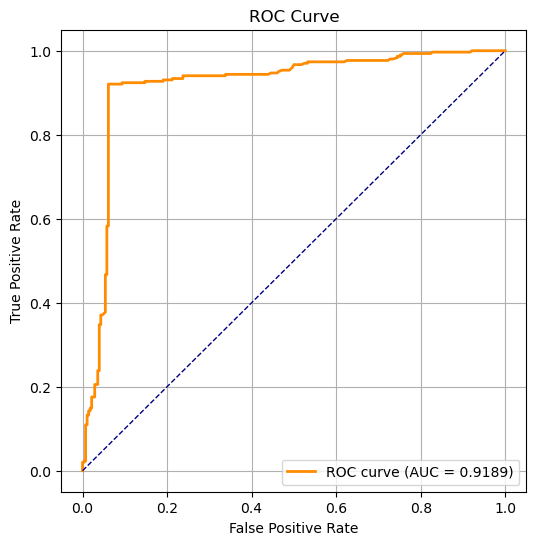

In [8]:
from sklearn.metrics import roc_curve, auc

def metrics_with_roc(yp, yt, threshold=0.5):
    y_pred = [1 if x >= threshold else 0 for x in yp]
    yt = list(yt.values)

    TP = sum(1 for p, y in zip(y_pred, yt) if p == y == 1)
    TN = sum(1 for p, y in zip(y_pred, yt) if p == y == 0)
    FP = sum(1 for p, y in zip(y_pred, yt) if p == 1 and y == 0)
    FN = sum(1 for p, y in zip(y_pred, yt) if p == 0 and y == 1)

    precision_pos = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall_pos = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_pos = 2 * precision_pos * recall_pos / (precision_pos + recall_pos) if (precision_pos + recall_pos) != 0 else 0

    precision_neg = TN / (TN + FN) if (TN + FN) != 0 else 0
    recall_neg = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1_neg = 2 * precision_neg * recall_neg / (precision_neg + recall_neg) if (precision_neg + recall_neg) != 0 else 0

    accuracy = (TP + TN) / len(yt)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall (Positive): {recall_pos:.4f}")
    print(f"Recall (Negative): {recall_neg:.4f}")
    print(f"Precision (Positive): {precision_pos:.4f}")
    print(f"Precision (Negative): {precision_neg:.4f}")
    print(f"F1 Score (Positive): {f1_pos:.4f}")
    print(f"F1 Score (Negative): {f1_neg:.4f}")

    fpr, tpr, _ = roc_curve(yt, yp)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Run evaluation
metrics_with_roc(pred_proba_one, y_test)


## 🧮 Step 6: Z-scores (Logits)
We extract decision function scores (logits before sigmoid) to analyze margin.


In [9]:
z_scores = model.decision_function(X)
print("Z-scores (logits):", z_scores[:10])


Z-scores (logits): [ 2.39091863 -2.55233164 -2.23794571  3.29058521  2.59126427  2.7263201
  2.70608761  2.95045737 -1.91805036  3.33046968]


## 📊 Step 7: Interpret Coefficients using Statsmodels
We use `statsmodels` to get standard errors, p-values, and interpretability.

In [11]:
import statsmodels.api as sm

# Add intercept manually
X_with_intercept = sm.add_constant(X)  # Adds a column of 1s for bias term
sm_model = sm.Logit(y, X_with_intercept).fit()
print(sm_model.summary())


Optimization terminated successfully.
         Current function value: 0.265341
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2894
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Jul 2025   Pseudo R-squ.:                  0.6170
Time:                        20:36:22   Log-Likelihood:                -769.49
converged:                       True   LL-Null:                       -2009.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.7296      0.406      1.795      0.073      -0.067   